In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import sklearn.datasets

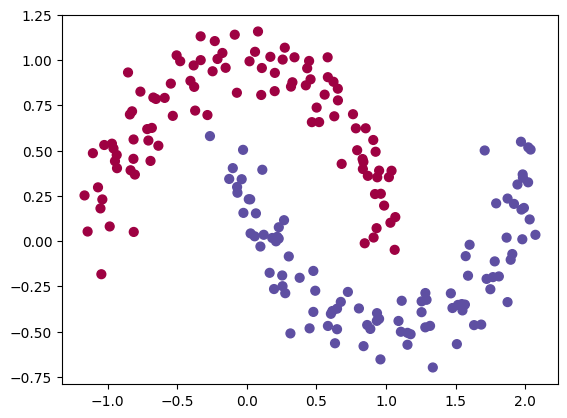

In [2]:
#matplotlib.style.use('ggplot') #makes plots look pretty

# Generate a dataset and plot it
np.random.seed(0)
x, Y = sklearn.datasets.make_moons(200, noise=0.1)
# X coordinates
#print('this is x',X)
#Y cordinates
#print('This is y',y)
#desplaying half moon dataset
plt.scatter(x[:,0], x[:,1], s=40, c=Y, cmap=plt.cm.Spectral)

In [3]:
# Assigning the learning rate
learningRate = 0.01

# Adding the X0=1 in the data set 
oneVector = np.ones((x.shape[0], 1))
X = np.concatenate((oneVector, x), axis=1)
print('this is x array:',X)
print('this is class ',Y)

plotData = []

#Assigning random weights 
weights = np.random.rand(3, 1)

misClassifications = 1
minMisclassifications = 1000
#Initial iteration starts from
iteration = 0

this is x array: [[ 1.00000000e+00  7.92357355e-01  5.02648573e-01]
 [ 1.00000000e+00  1.63158315e+00 -4.63896705e-01]
 [ 1.00000000e+00 -6.71092674e-02  2.67767057e-01]
 [ 1.00000000e+00 -1.04412427e+00 -1.82607610e-01]
 [ 1.00000000e+00  1.76704822e+00 -1.98609868e-01]
 [ 1.00000000e+00  1.90607398e+00 -7.10915927e-02]
 [ 1.00000000e+00  9.62192129e-01  2.61986075e-01]
 [ 1.00000000e+00  8.86813848e-01 -4.84896235e-01]
 [ 1.00000000e+00  8.68935196e-01  3.61092776e-01]
 [ 1.00000000e+00  1.15352953e+00 -5.72352929e-01]
 [ 1.00000000e+00 -3.70714493e-01  7.21655833e-01]
 [ 1.00000000e+00  1.95523229e-01 -2.64439358e-01]
 [ 1.00000000e+00  1.80949658e+00 -1.94707885e-01]
 [ 1.00000000e+00  1.29046617e+00 -3.23893778e-01]
 [ 1.00000000e+00 -8.23662620e-01  7.17643700e-01]
 [ 1.00000000e+00  9.85881879e-01  1.96706218e-01]
 [ 1.00000000e+00  5.81943503e-01  9.06311048e-01]
 [ 1.00000000e+00  2.76118902e-01 -2.87451069e-01]
 [ 1.00000000e+00  3.17284813e-01  8.54200996e-01]
 [ 1.00000000e

In [4]:
# Psudocode for pocket algorithm
while (misClassifications != 0 and (iteration<1000)):
    iteration += 1
    misClassifications = 0

    for i in range(0, len(X)):
        currentX = X[i].reshape(-1, X.shape[1])
        currentY = Y[i]
        wTx = np.dot(currentX, weights)[0][0]
        #same as PLA algorithm 
        if currentY == 1 and wTx < 0:
            misClassifications += 1
            weights = weights + learningRate * currentX.T
        elif currentY == 0 and wTx > 0:
            misClassifications += 1
            weights = weights - learningRate * currentX.T
    plotData.append(misClassifications)
    
    if misClassifications<minMisclassifications:
        minMisclassifications = misClassifications
    # if iteration%1==0:
    print("Iteration {}, Misclassifications {}".format(iteration, misClassifications))

Iteration 1, Misclassifications 104
Iteration 2, Misclassifications 85
Iteration 3, Misclassifications 43
Iteration 4, Misclassifications 39
Iteration 5, Misclassifications 38
Iteration 6, Misclassifications 37
Iteration 7, Misclassifications 36
Iteration 8, Misclassifications 34
Iteration 9, Misclassifications 37
Iteration 10, Misclassifications 35
Iteration 11, Misclassifications 36
Iteration 12, Misclassifications 37
Iteration 13, Misclassifications 41
Iteration 14, Misclassifications 36
Iteration 15, Misclassifications 33
Iteration 16, Misclassifications 39
Iteration 17, Misclassifications 34
Iteration 18, Misclassifications 36
Iteration 19, Misclassifications 42
Iteration 20, Misclassifications 34
Iteration 21, Misclassifications 35
Iteration 22, Misclassifications 41
Iteration 23, Misclassifications 36
Iteration 24, Misclassifications 33
Iteration 25, Misclassifications 38
Iteration 26, Misclassifications 37
Iteration 27, Misclassifications 38
Iteration 28, Misclassifications 34


In [5]:
# Checking the accuracy of the algorithm

# Here Min missclassification is the lowest error points found during linear classification
print ("Minimum Misclassifications : ",minMisclassifications)
print('Updates weight is: ',weights.T)
print ("Best Case Accuracy of Pocket Learning Algorithm is: ",(((X.shape[0]-minMisclassifications)/X.shape[0])*100),"%")

Minimum Misclassifications :  28
Updates weight is:  [[ 0.00499445  0.01149508 -0.02677162]]
Best Case Accuracy of Pocket Learning Algorithm is:  86.0 %


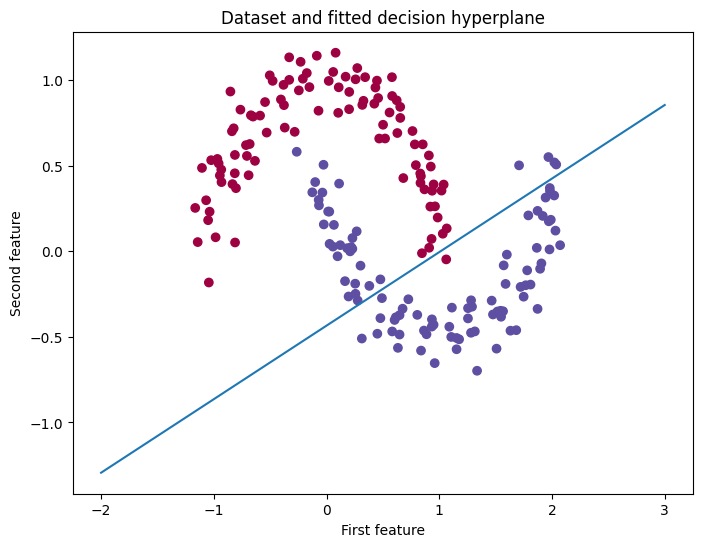

In [6]:
def plot_hyperplane(X, Y, weights, bias):
    slope = - weights[1]/weights[2]
    intercept = - bias/weights[1]
    x_hyperplane = np.linspace(-2,3,10)
    y_hyperplane = slope * x_hyperplane + intercept
    plt.figure(figsize=(8,6))
    plt.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.Spectral)
    plt.plot(x_hyperplane, y_hyperplane, '-')
    plt.title("Dataset and fitted decision hyperplane")
    plt.xlabel("First feature")
    plt.ylabel("Second feature")
    plt.show()
    
    
plot_hyperplane(x, Y, weights,weights[0] )